In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
win=pd.read_csv("Desktop\data2\winemag-data_first150k.csv",index_col=0)
win.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [2]:
win.describe(include='all')

,country,description,designation,points,price,province,region_1,region_2,variety,winery
count,150925,150930,105195,150930.000000,137235.000000,150925,125870,60953,150930,150930
unique,48,97821,30621,NaN,NaN,455,1236,18,632,14810
top,US,A little bit funky and unsettled when you pop ...,Reserve,NaN,NaN,California,Napa Valley,Central Coast,Chardonnay,Williams Selyem
freq,62397,6,2752,NaN,NaN,44508,6209,13057,14482,374
mean,NaN,NaN,NaN,87.888418,33.131482,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.222392,36.322536,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,16.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,24.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,90.000000,40.000000,NaN,NaN,NaN,NaN,NaN


In [3]:
win.info()
win.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


country           48
description    97821
designation    30621
points            21
price            357
province         455
region_1        1236
region_2          18
variety          632
winery         14810
dtype: int64

In [4]:
win['designation'].fillna('designation1',inplace=True)
win['price'].fillna(0,inplace=True)
win['province'].fillna('pro',inplace=True)
win['region_1'].fillna('region_1',inplace=True)
win['region_2'].fillna('region_2',inplace=True)
win['country'].fillna('country',inplace=True)

In [5]:
win.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150930 non-null object
description    150930 non-null object
designation    150930 non-null object
points         150930 non-null int64
price          150930 non-null float64
province       150930 non-null object
region_1       150930 non-null object
region_2       150930 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


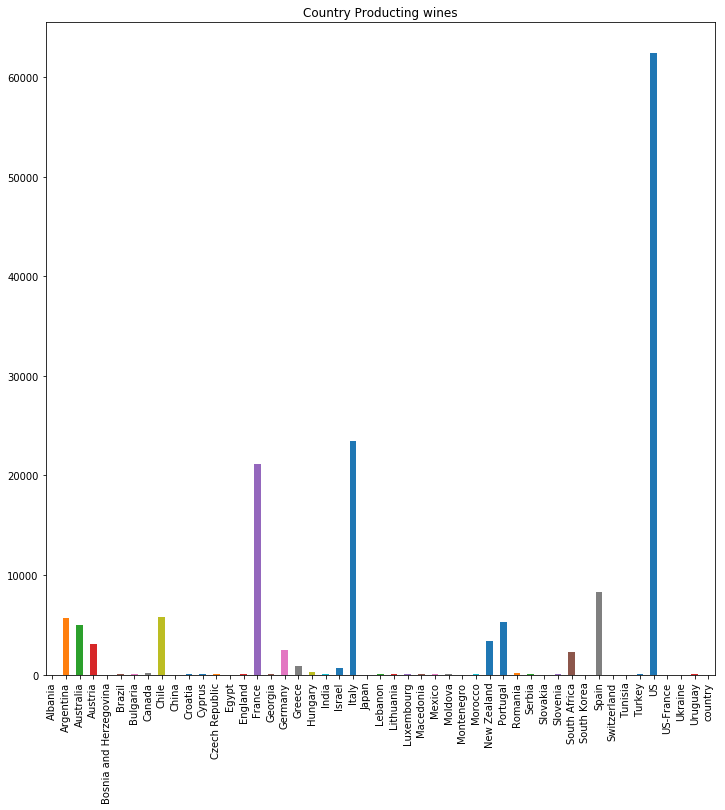

In [6]:
win['country'].value_counts().sort_index().plot.bar(figsize=(12,12),title='Country Producting wines')

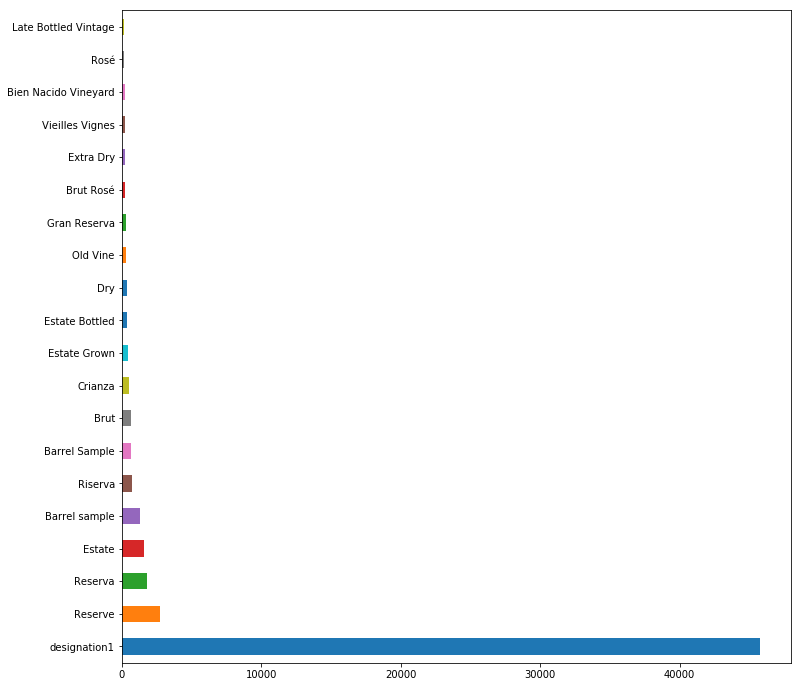

In [7]:
win['designation'].value_counts().sort_index().nlargest(20).plot.barh(figsize=(12,12))

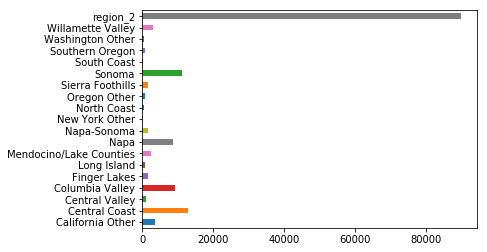

In [8]:
win['region_2'].value_counts().sort_index().plot.barh()

Text(0,0.5,'largest 25 Region_1')

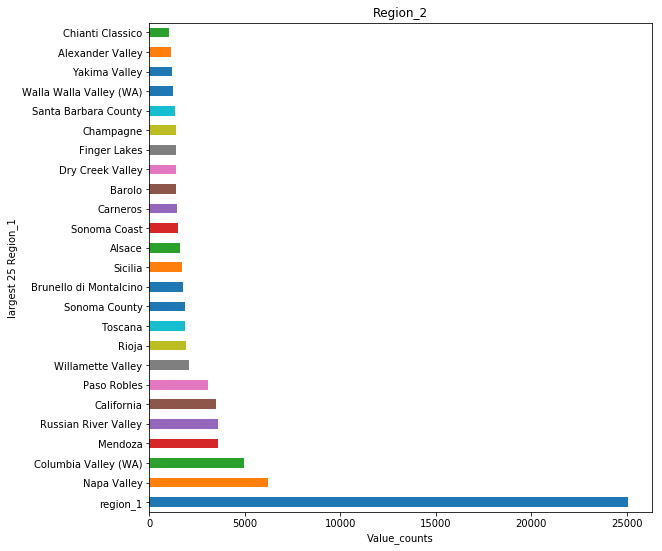

In [9]:
win['region_1'].value_counts().sort_index().nlargest(25).plot.barh(figsize=(9,9),title="Region_2")
plt.xlabel('Value_counts')
plt.ylabel('largest 25 Region_1')

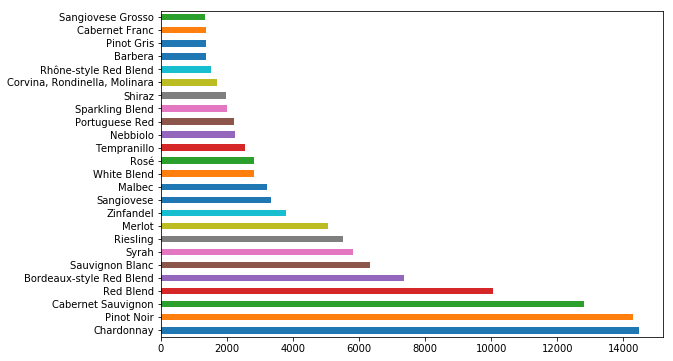

In [10]:
win['variety'].value_counts().sort_index().nlargest(25).plot.barh(figsize=(9,6))

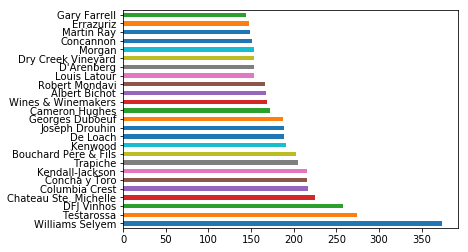

In [11]:
win['winery'].value_counts().sort_index().nlargest(25).plot.barh()

In [12]:
y=win.price
win_feature=['points']
x=win[win_feature]
x.describe()
x.head()

,points
0,96
1,96
2,96
3,96
4,95


In [30]:
from sklearn.naive_bayes import GaussianNB
win_model=GaussianNB()
win_model.fit(x,y)
print(win_model.predict(x.head()))

[303. 303. 303. 303. 239.]


In [13]:
from sklearn.neighbors import KNeighborsClassifier
win_model=KNeighborsClassifier(n_neighbors=5,leaf_size=300)
win_model.fit(x,y)
print(win_model.predict(x.head()))
#print(win_model.predict_prob())

[45. 45. 45. 45.  0.]


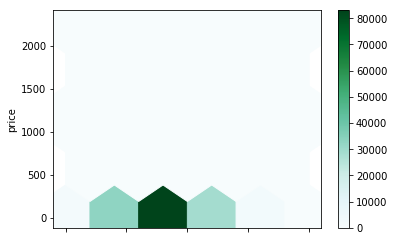

In [17]:
win[win['points']<101].plot.hexbin(x='points',y='price',gridsize=5)

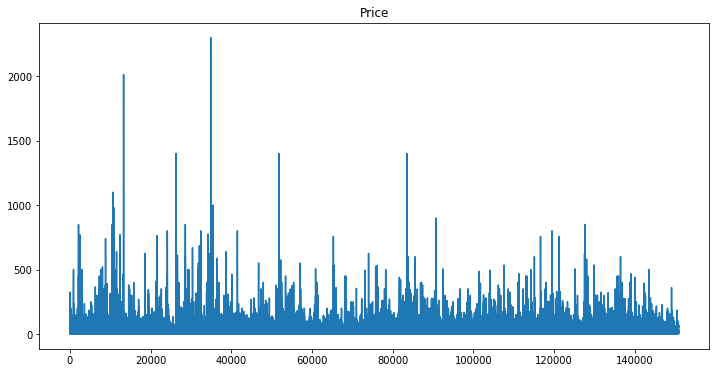

In [20]:
win['price'].plot.line(figsize=(12,6),title="Price")
plt.xlabel='price'
plt.ylabel='value_counts'
                       


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


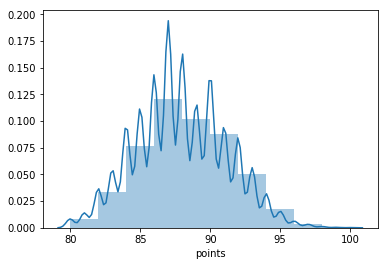

In [21]:
import seaborn as sns
sns.distplot(win['points'],bins=10,kde=True)

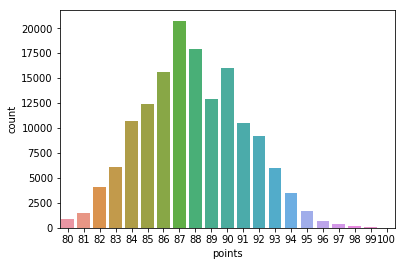

In [22]:
sns.countplot(win['points'])

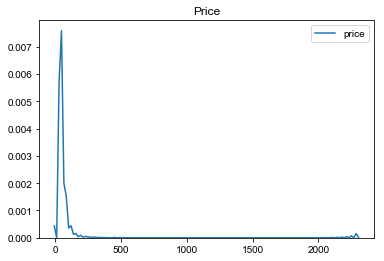

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('Price')
#plt.figsize=(12,12)
sns.kdeplot(win['price'])
sns.set(rc={'figure.figsize':(20,40)})
sns.set_style('whitegrid')

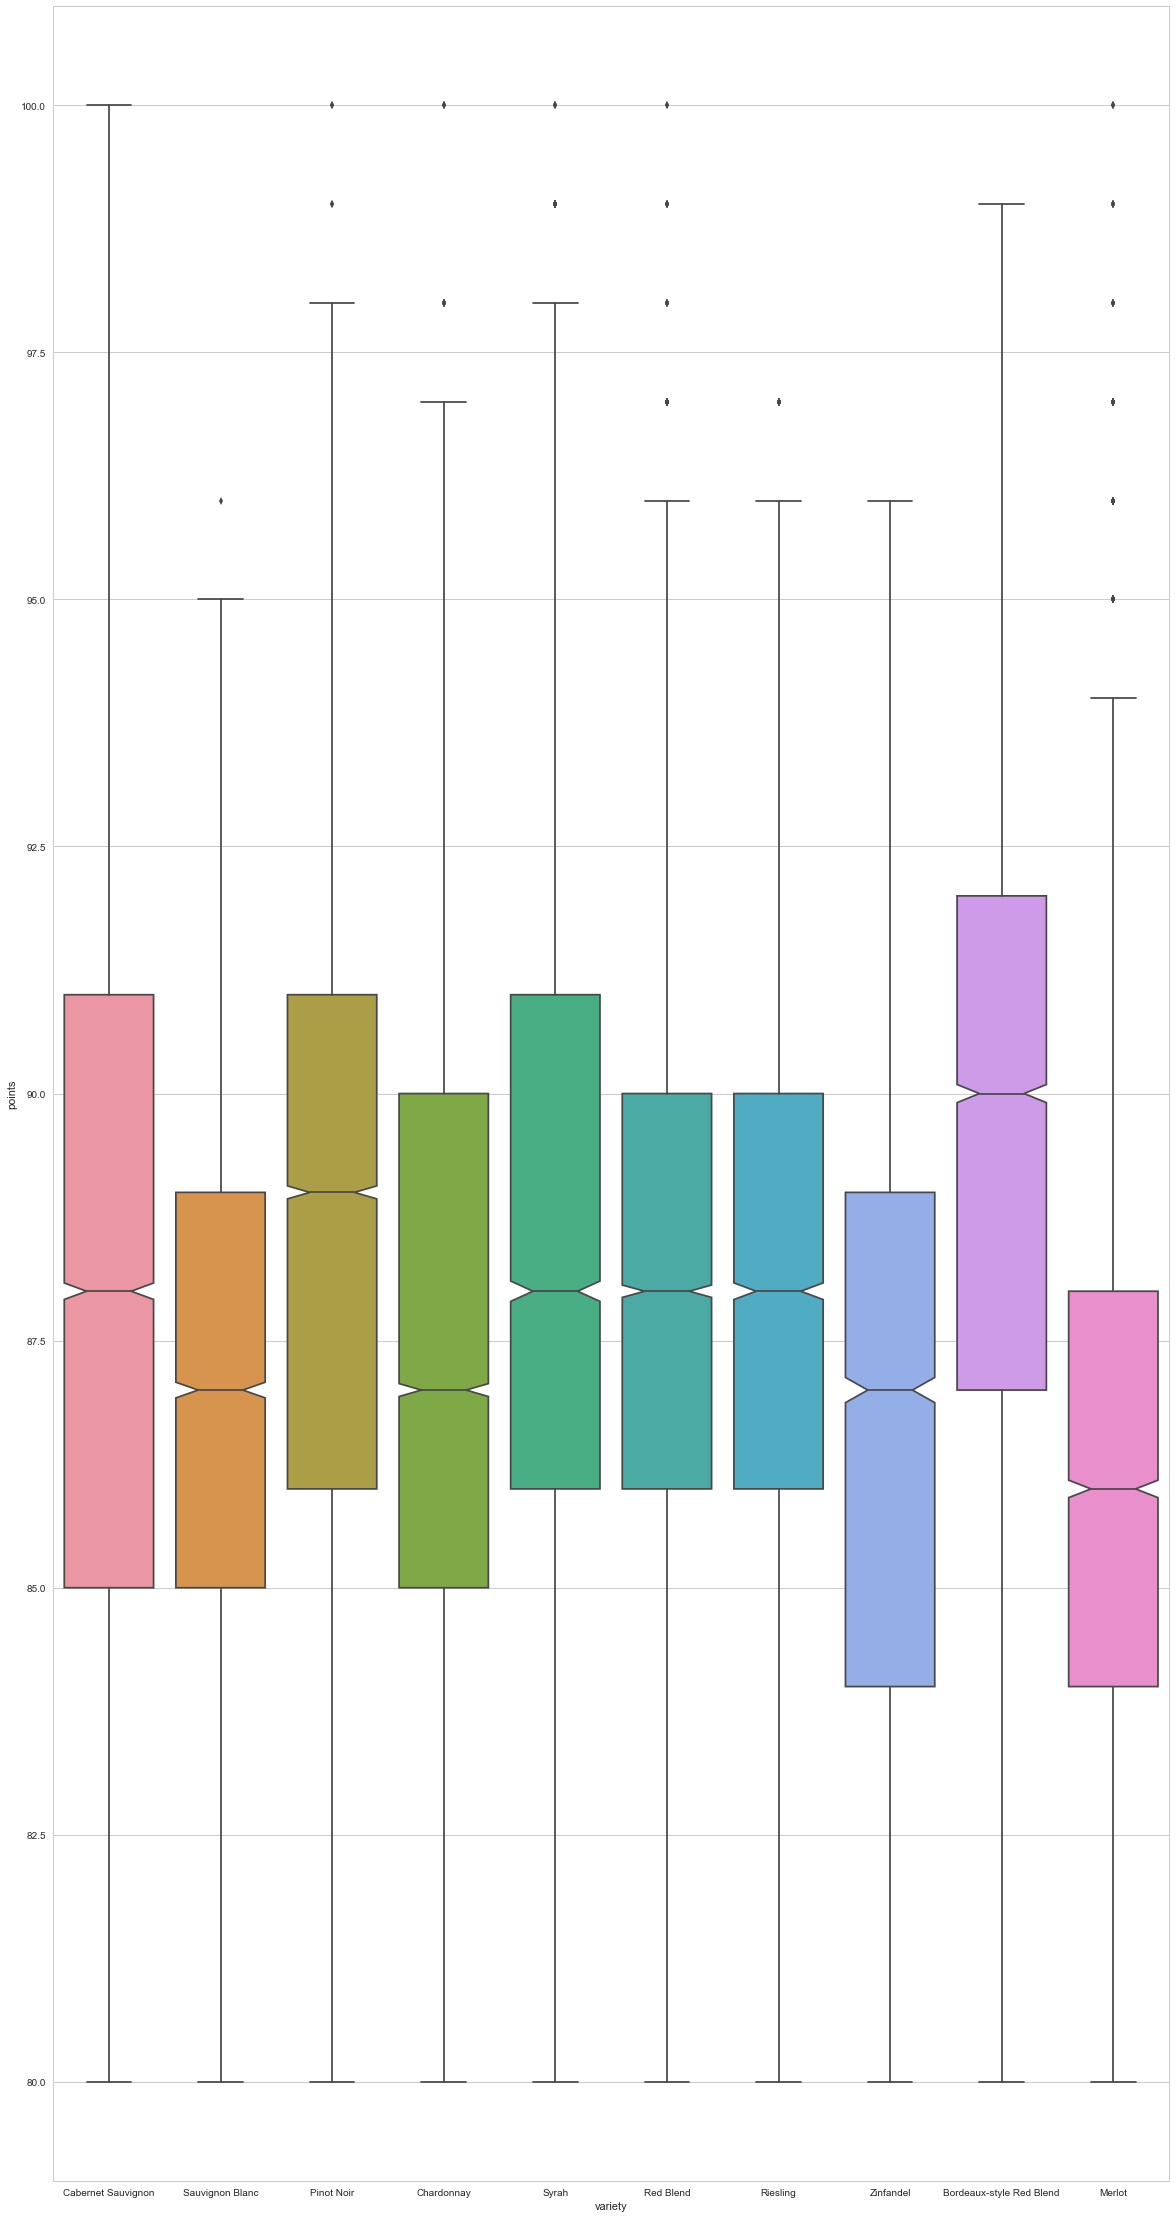

In [31]:
df=win[win.variety.isin(win.variety.value_counts().head(10).index)]
sns.boxplot(x='variety',y='points',data=df,notch=True)

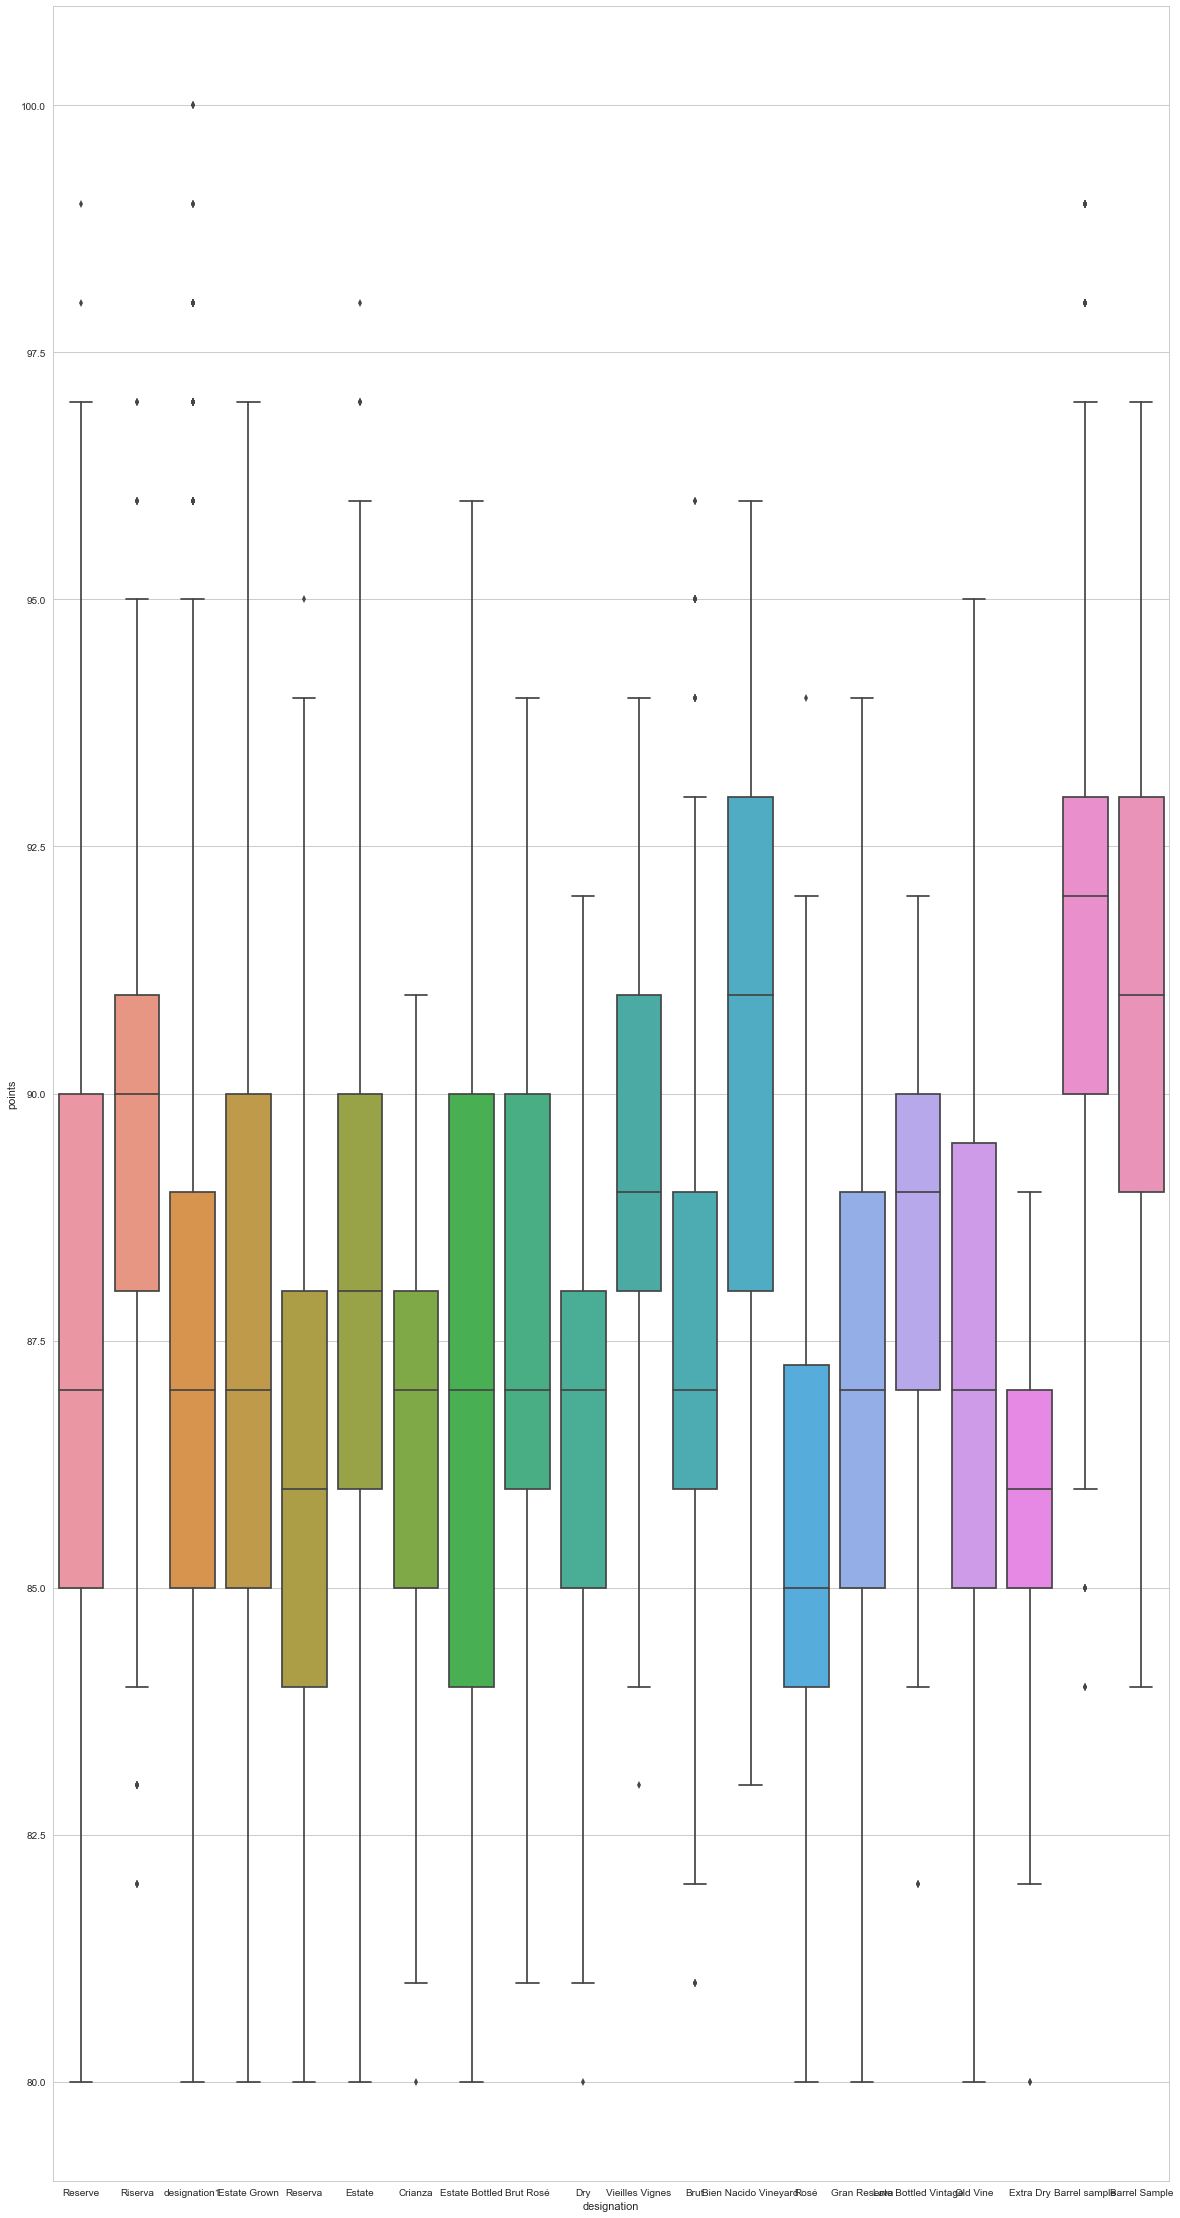

In [37]:
dt=win[win['designation'].isin(win.designation.value_counts().head(20).index)]
sns.boxplot(x='designation',y='points',data=dt)

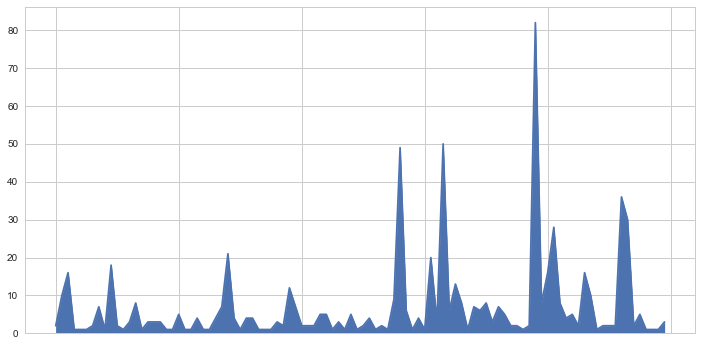

In [38]:
win['winery'].value_counts().sort_index().head(100).plot.area(figsize=(12,6))

In [39]:
win['winery'].describe()

count              150930
unique              14810
top       Williams Selyem
freq                  374
Name: winery, dtype: object

In [40]:
win.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150930 non-null object
description    150930 non-null object
designation    150930 non-null object
points         150930 non-null int64
price          150930 non-null float64
province       150930 non-null object
region_1       150930 non-null object
region_2       150930 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 17.7+ MB


In [73]:
reviews['designation'].describe()

count      105195
unique      30621
top       Reserve
freq         2752
Name: designation, dtype: object

In [66]:
reviews['province'].describe()

count         150925
unique           455
top       California
freq           44508
Name: province, dtype: object

In [67]:
reviews['region_1'].describe()

count          125870
unique           1236
top       Napa Valley
freq             6209
Name: region_1, dtype: object

In [68]:
reviews['variety'].describe()

count         150930
unique           632
top       Chardonnay
freq           14482
Name: variety, dtype: object

In [20]:
import seaborn as sns
sns.countplot[reviews['price']

SyntaxError: unexpected EOF while parsing (<ipython-input-20-18b6d39e39fa>, line 2)

In [21]:
reviews['price'].describe()

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

In [22]:
reviews['country'].describe()

count     150925
unique        48
top           US
freq       62397
Name: country, dtype: object

In [23]:
reviews['description'].describe()

count                                                150930
unique                                                97821
top       86-88 This could work as a rich wine, because ...
freq                                                      6
Name: description, dtype: object

In [25]:
reviews['designation'].describe()

count      105195
unique      30621
top       Reserve
freq         2752
Name: designation, dtype: object

In [26]:
reviews['points'].describe()

count    150930.000000
mean         87.888418
std           3.222392
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

In [27]:
reviews['designation'].describe()

count      105195
unique      30621
top       Reserve
freq         2752
Name: designation, dtype: object

In [51]:
import pandas as pd
reviews=pd.read_csv("Desktop\data2\winemag-data_first150k.csv",index_col=0)
reviews.head(3)


,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [2]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


In [52]:
win=reviews.dropna()


In [53]:
win.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39241 entries, 0 to 150916
Data columns (total 10 columns):
country        39241 non-null object
description    39241 non-null object
designation    39241 non-null object
points         39241 non-null int64
price          39241 non-null float64
province       39241 non-null object
region_1       39241 non-null object
region_2       39241 non-null object
variety        39241 non-null object
winery         39241 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 3.3+ MB


In [6]:
win.describe(include='all')

,country,description,designation,points,price,province,region_1,region_2,variety,winery
count,39241,39241,39241,39241.000000,39241.000000,39241,39241,39241,39241,39241
unique,1,25422,10879,NaN,NaN,4,209,18,180,3395
top,US,Well integrated charred oak melds well with ri...,Reserve,NaN,NaN,California,Napa Valley,Central Coast,Pinot Noir,Williams Selyem
freq,39241,4,1848,NaN,NaN,28557,3509,9150,7442,302
mean,NaN,NaN,NaN,88.359981,37.546316,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.438542,26.716547,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,22.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,32.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,45.000000,NaN,NaN,NaN,NaN,NaN


In [8]:
win.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

Text(0,0.5,'Counts')

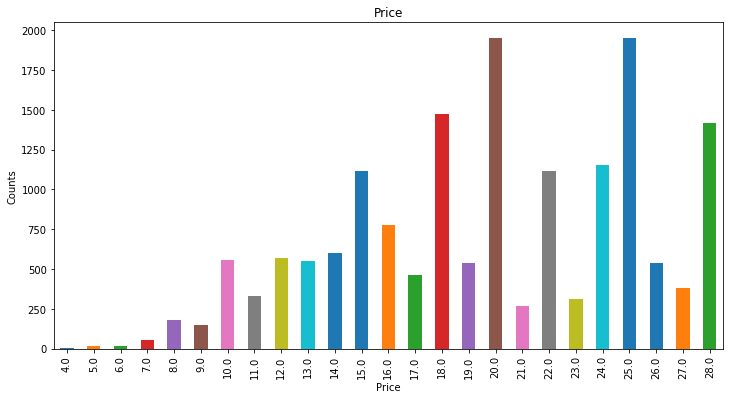

In [11]:
import matplotlib.pyplot as plt
win['price'].value_counts().sort_index().head(25).plot.bar(title='Price',figsize=(12,6))
plt.xlabel('Price')
plt.ylabel('Counts')

Text(0,0.5,'Counts')

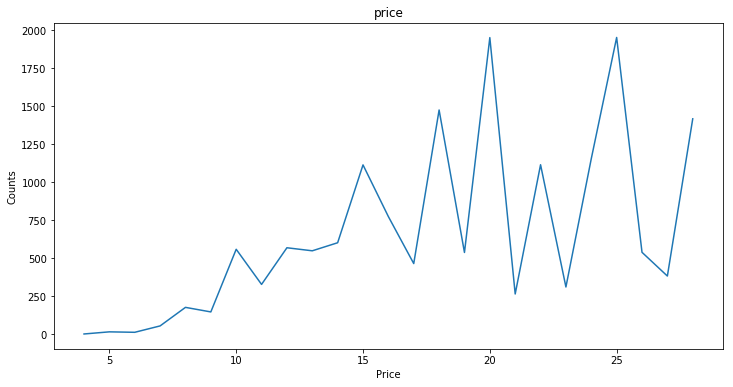

In [12]:
win['price'].value_counts().sort_index().head(25).plot.line(title='price',figsize=(12,6))
plt.xlabel('Price')
plt.ylabel('Counts')

Text(0,0.5,'Counts')

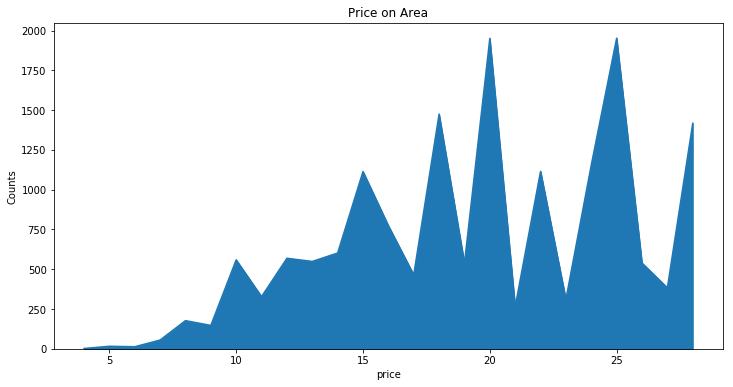

In [13]:
win['price'].value_counts().sort_index().head(25).plot.area(title='Price on Area',figsize=(12,6))
plt.xlabel('price')
plt.ylabel('Counts')

TypeError: 'str' object is not callable

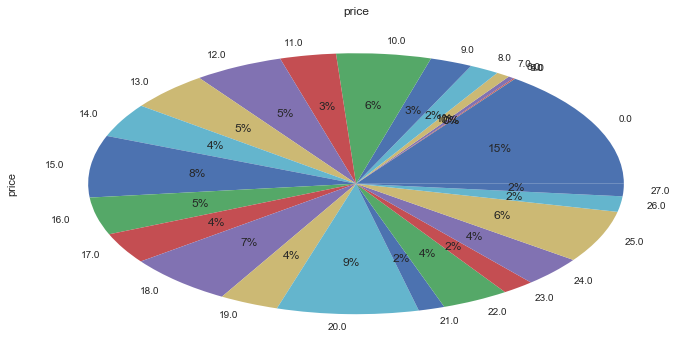

In [41]:
win['price'].value_counts().sort_index().head(25).plot.pie(title='price',figsize=(12,6),autopct='%1.lf%%')
plt.xlabel('price')
plt.ylabel('Counts')

Text(0,0.5,'Counts')

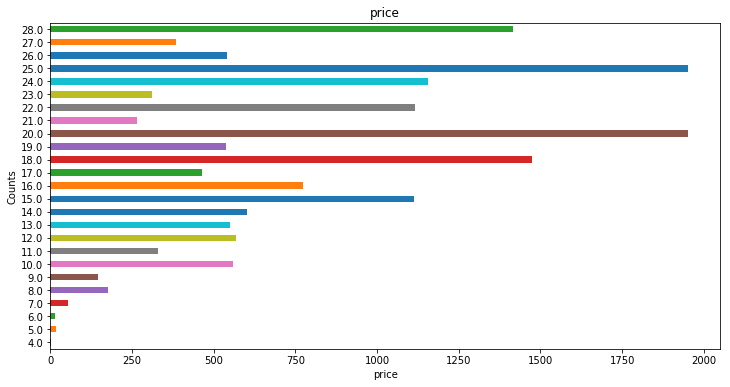

In [16]:
win['price'].value_counts().sort_index().head(25).plot.barh(title='Price_Horiztonalbar',figsize=(12,6))
plt.xlabel('price')
plt.ylabel('Counts')

Text(0,0.5,'Counts')

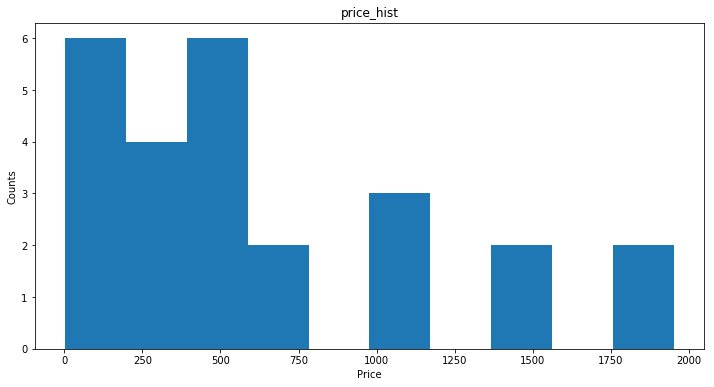

In [17]:
win['price'].value_counts().sort_index().head(25).plot.hist(title='price_hist',figsize=(12,6))
plt.xlabel('Price')
plt.ylabel('Counts')

In [18]:
#Bivariate  plot

Text(0,0.5,'points')

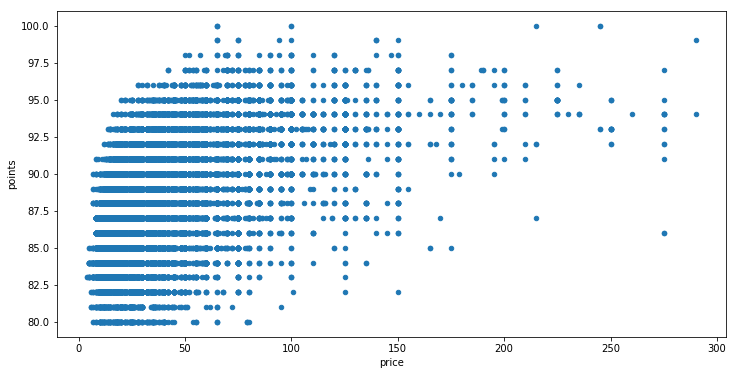

In [23]:
win[win['price']<300].sort_index().plot.scatter(x='price',y='points',figsize=(12,6))
plt.xlabel('price')
plt.ylabel('points')

Text(0,0.5,'points')

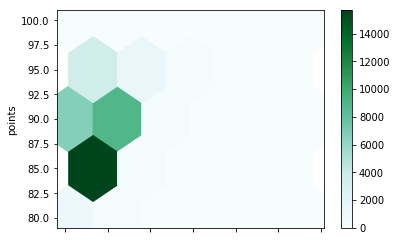

In [28]:
win[win['price']<300].sort_index().plot.hexbin(x='price',y='points',gridsize=5)
plt.xlabel('price')
plt.ylabel('points')

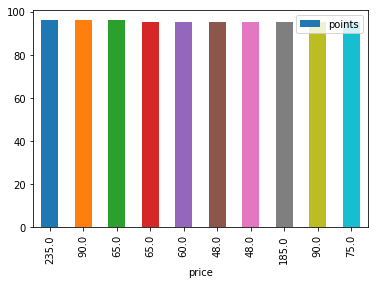

In [31]:
win[win['price']<300].sort_index().head(10).plot.bar(x='price',y='points',stacked=True)

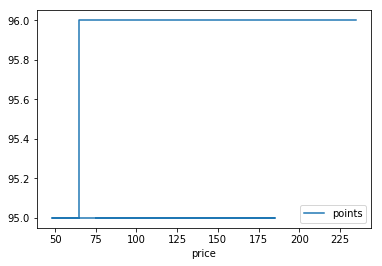

In [32]:
win[win['price']<300].sort_index().head(10).plot.line(x='price',y='points',stacked=True)

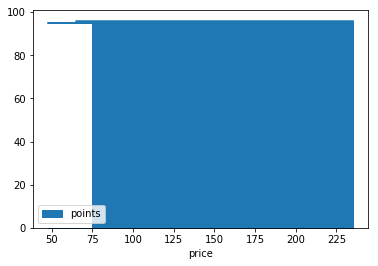

In [33]:
win[win['price']<300].sort_index().head(10).plot.area(x='price',y='points',stacked=True)

In [34]:
import seaborn as sns


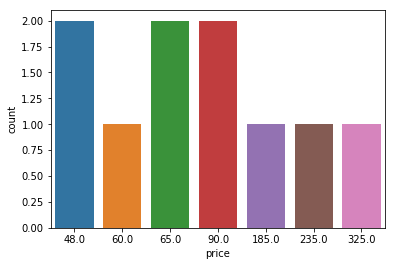

In [42]:
sns.countplot((win['price']).head(10))

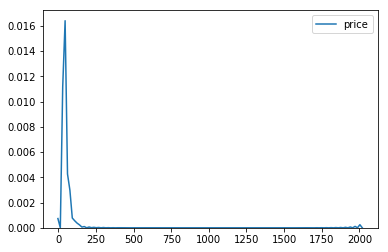

In [43]:
sns.kdeplot(win['price'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


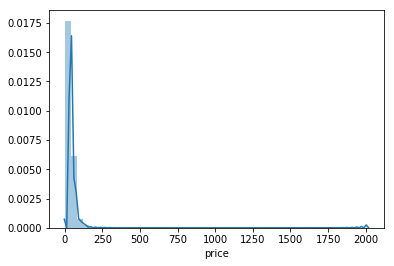

In [50]:
sns.distplot(win['price'])

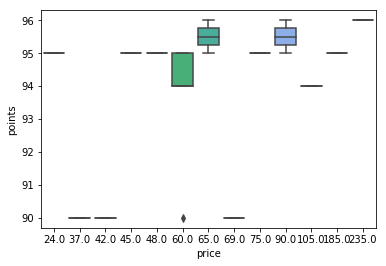

In [58]:
import seaborn as sns
df=win[win['price']<300].head(20)
sns.boxplot(x='price',y='points',data=df)

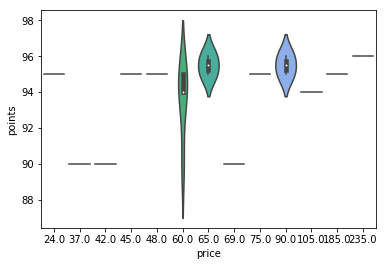

In [62]:
sns.violinplot(x='price',y='points',data=df,kind='kde')

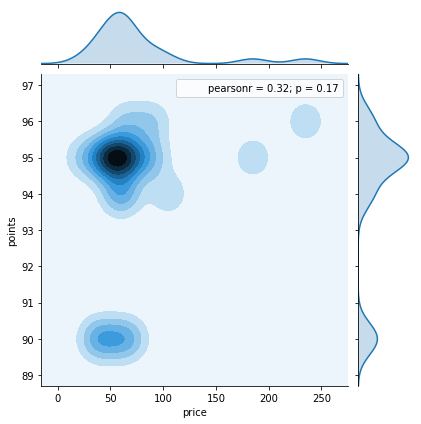

In [63]:
sns.jointplot(x='price',y='points',data=df,kind='kde')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


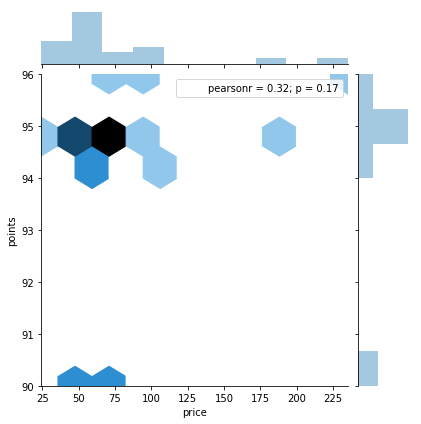

In [64]:
sns.jointplot(x='price',y='points',data=df,kind='hex')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


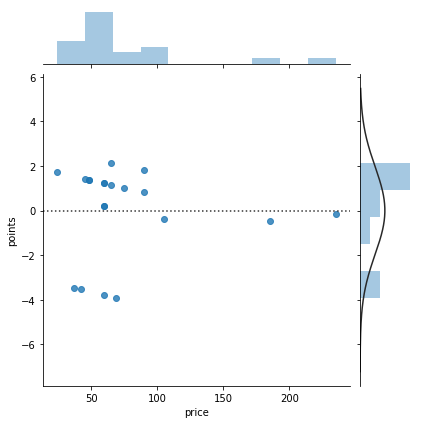

In [65]:
sns.jointplot(x='price',y='points',data=df,kind='resid')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


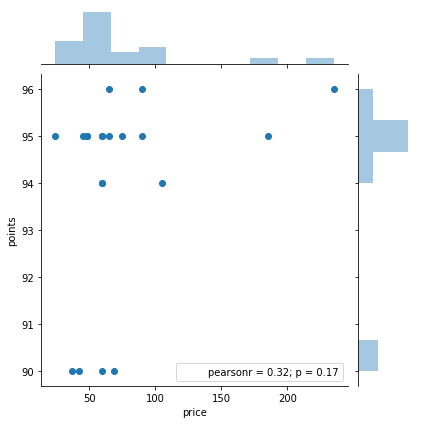

In [66]:
sns.jointplot(x='price',y='points',data=df,kind='scatter')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


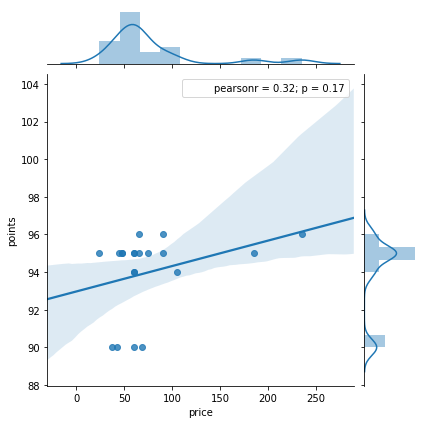

In [67]:
sns.jointplot(x='price',y='points',data=df,kind='reg')

In [69]:
sns.heatmap(df,annot=True)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

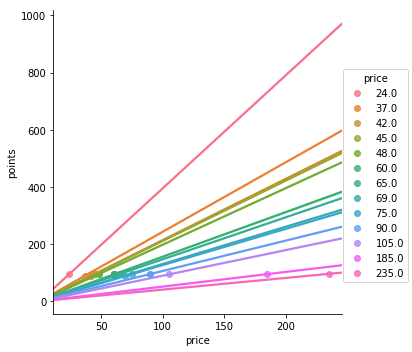

In [71]:
sns.lmplot(x='price',y='points',hue='price',data=df,fit_reg=True)

In [73]:
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learnig.ex2 import *
print("Setup Complete")

ModuleNotFoundError: No module named 'learntools'

In [74]:
import pandas as pd
reviews=pd.read_csv("Desktop\data2\winemag-data_first150k.csv",index_col=0)
reviews.head(3)


,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [75]:
win=reviews.dropna()
win.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39241 entries, 0 to 150916
Data columns (total 10 columns):
country        39241 non-null object
description    39241 non-null object
designation    39241 non-null object
points         39241 non-null int64
price          39241 non-null float64
province       39241 non-null object
region_1       39241 non-null object
region_2       39241 non-null object
variety        39241 non-null object
winery         39241 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 3.3+ MB


In [76]:
win.describe(include='all')

,country,description,designation,points,price,province,region_1,region_2,variety,winery
count,39241,39241,39241,39241.000000,39241.000000,39241,39241,39241,39241,39241
unique,1,25422,10879,NaN,NaN,4,209,18,180,3395
top,US,Well integrated charred oak melds well with ri...,Reserve,NaN,NaN,California,Napa Valley,Central Coast,Pinot Noir,Williams Selyem
freq,39241,4,1848,NaN,NaN,28557,3509,9150,7442,302
mean,NaN,NaN,NaN,88.359981,37.546316,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.438542,26.716547,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,22.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,32.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,45.000000,NaN,NaN,NaN,NaN,NaN


In [77]:
win.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [88]:
y=win.price
win_feature=['points']
x=win[win_feature]
x.describe()
x.head()

,points
0,96
2,96
3,96
8,95
9,95


In [89]:
from sklearn.tree import DecisionTreeRegressor
win_model=DecisionTreeRegressor(random_state=3)
win_model.fit(x,y)
print(win_model.predict(x.head()))

[86.76404494 86.76404494 86.76404494 74.84090909 74.84090909]


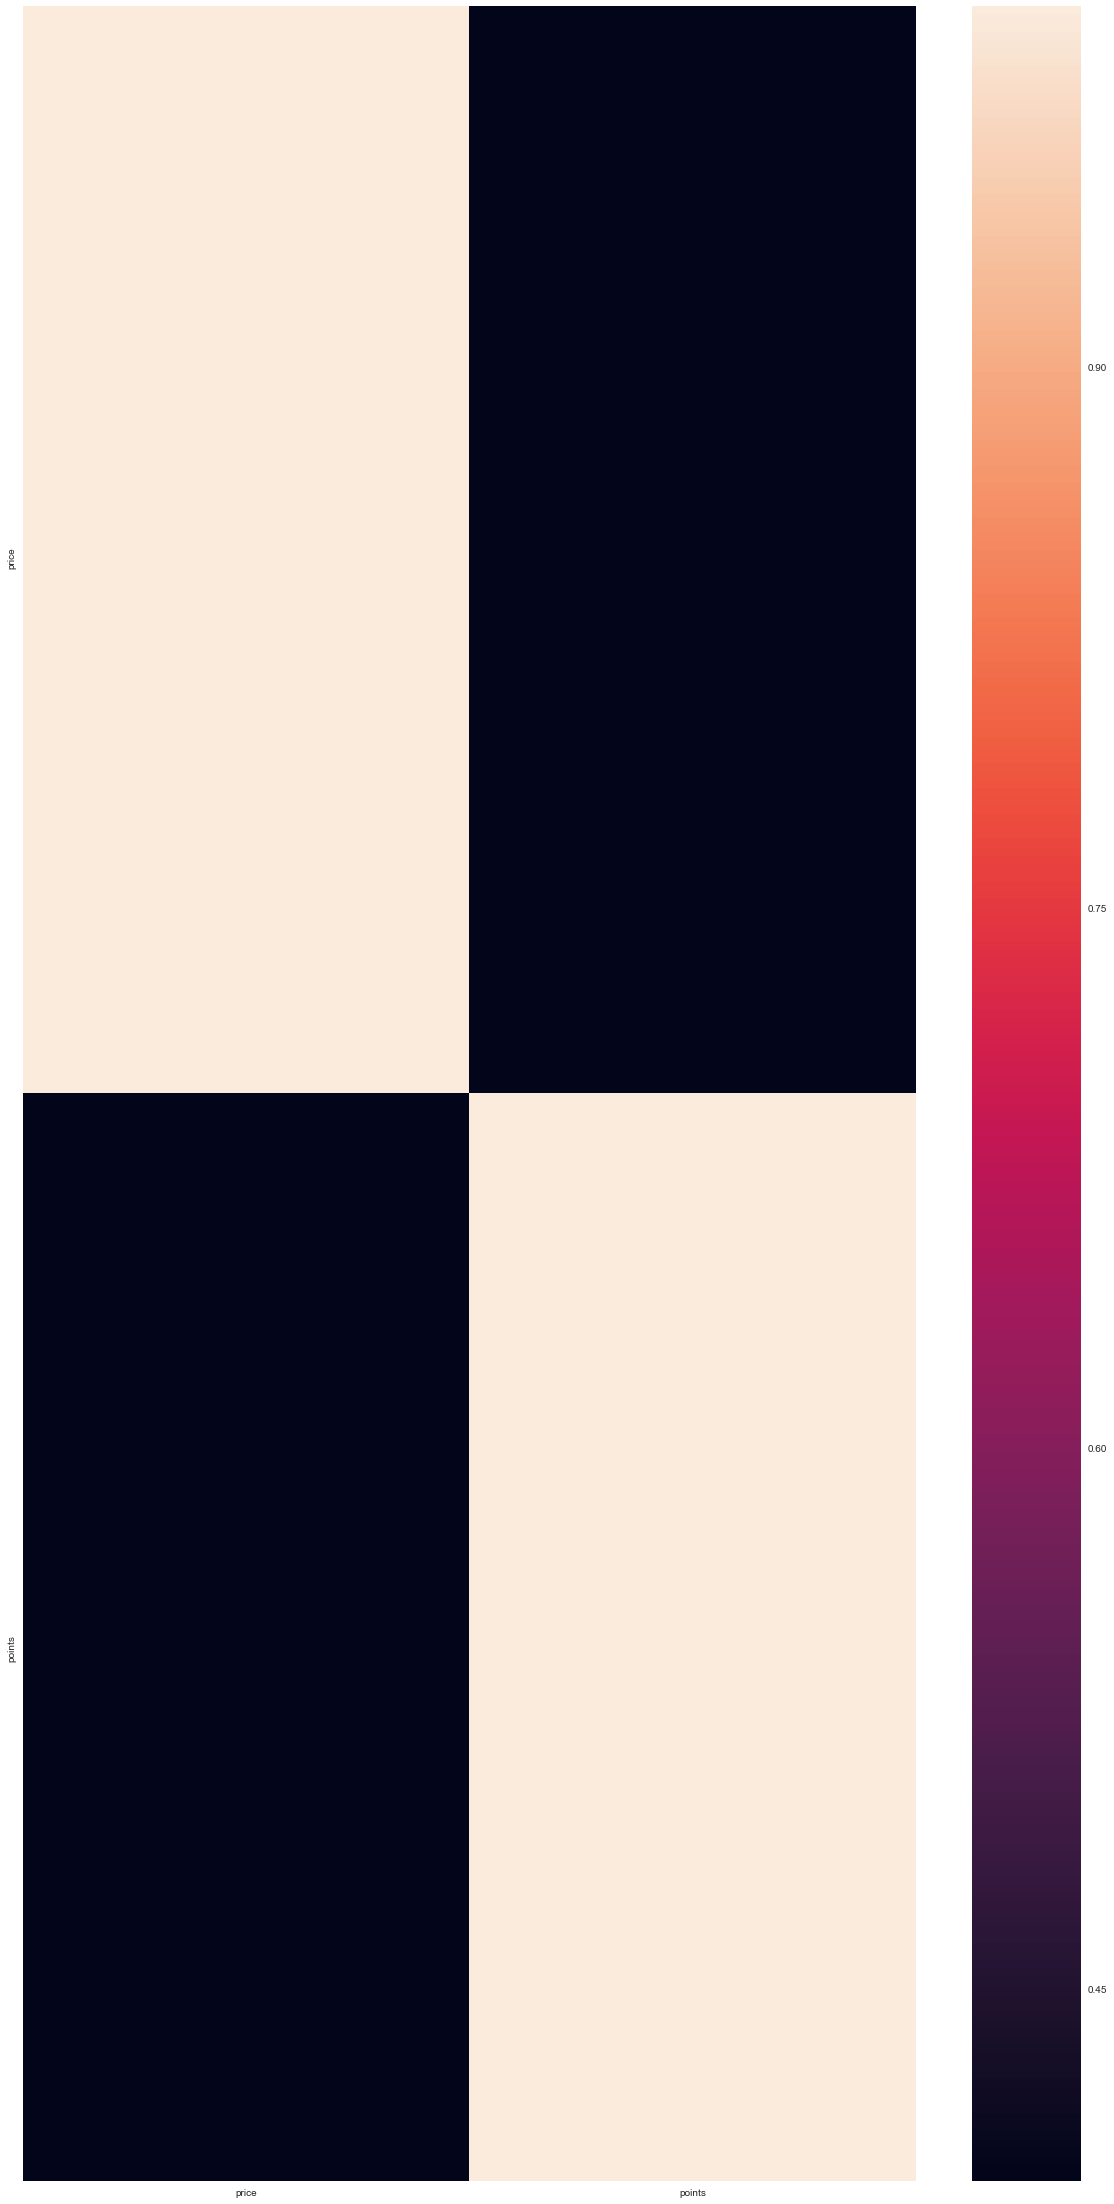

In [45]:
sns.heatmap(win.loc[:,['price','points']].corr(),annot=False)

In [48]:
from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
import plotly.graph_objs as go

iplot([go.Scatter(x=win.head(1000)['points'], y=win.head(1000)['price'], mode='markers')])

ModuleNotFoundError: No module named 'plotly'